In [ ]:
"""
-content(原本colab 已經存在的根目錄)
  |
  |-train_DR
  |
  |-dataset
  |  |--split_train
  |  |
  |  |--split_validation
  |  |
  |  |--test
  |-Test.csv
  |-Train.csv
"""

'\n-content(原本colab 已經存在的根目錄)\n  |\n  |-train_DR\n  |\n  |-dataset\n  |  |--split_train\n  |  |\n  |  |--split_validation\n  |  |\n  |  |--test\n  |-Test.csv\n  |-Train.csv\n'

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/My Drive/

/gdrive/My Drive


In [ ]:
"""
用於split_data函數
"""
import random
from shutil import copyfile

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    """
    Splits the data into train and test sets

    Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

    Returns:
    None
    """
    listdir_image_source = os.listdir(SOURCE_DIR)

    for dir in listdir_image_source:
        if os.path.getsize(os.path.join(SOURCE_DIR,dir)) == 0:
            listdir_image_source.remove(dir)
            filename = dir
            print(f'{filename} is zero length, so ignoring.')

    number_of_available_images = len(listdir_image_source)
    file_to_training_dir = random.sample( listdir_image_source, int(len(listdir_image_source) * SPLIT_SIZE) )
    file_to_validation_dir = list( set(listdir_image_source).difference(set(file_to_training_dir)) )
    for dir in file_to_training_dir:
        source = os.path.join(SOURCE_DIR, dir)
        destination = TRAINING_DIR
        copyfile(source, os.path.join(destination, dir))

    for dir in file_to_validation_dir:
        source = os.path.join(SOURCE_DIR, dir)
        destination = VALIDATION_DIR
        copyfile(source, os.path.join(destination, dir))

In [ ]:

import pandas as pd

In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [ ]:
train.head()

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


In [ ]:
test.head()

,ID,filename,growth_stage,damage,season
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,V,WD,SR2020
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,F,WD,LR2021
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,V,WD,SR2021
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,F,G,LR2020
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,F,G,LR2021


In [ ]:
print("There are ",train.duplicated().sum()," data point are duplicated in train.")
print("There are ",test.duplicated().sum()," data point are duplicated in test.")

There are  0  data point are duplicated in train.
There are  0  data point are duplicated in test.


In [ ]:
reduced_train = train.drop(['ID','filename'],axis=1, inplace=False)
reduced_test = test.drop(['ID','filename'],axis=1, inplace=False)
total = pd.concat([reduced_train, reduced_test], ignore_index=True)
print("The shape of the reduced_train data:",reduced_train.shape)
print("The shape of the reduced_test data:",reduced_test.shape)
print("The shape of the total data",total.shape)

The shape of the reduced_train data: (26068, 4)
The shape of the reduced_test data: (8663, 3)
The shape of the total data (34731, 4)


In [ ]:
reduced_train.head()

,growth_stage,damage,extent,season
0,S,WD,0,SR2020
1,V,G,0,SR2021
2,V,G,0,LR2020
3,M,DR,60,SR2020
4,V,G,0,SR2021


In [ ]:
# 開始EDA

In [ ]:
num_var = [column for column in reduced_train.columns if reduced_train[column].nunique()>10]
bin_var = [column for column in reduced_train.columns if reduced_train[column].nunique() == 2]
cat_var = ['growth_stage','damage','season']
target = 'extent'

In [ ]:
print(" #numerical variables : ",len(num_var))
print(" #binary variables : ",len(bin_var))
print(" #categorical variables : ",len(cat_var))
print(" Target variable is :",target)

 #numerical variables :  1
 #binary variables :  0
 #categorical variables :  3
 Target variable is : extent


In [ ]:
reduced_train.describe()

,extent
count,26068.000000
mean,7.096056
std,18.613229
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [ ]:
"""
這個函數列出所有不同變數的
missing#
missing%
uniques
count
這在補缺失值的時候，相當相當重要!!
"""
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum()/len(df))
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values

    return sum

summary(reduced_train)


,dtypes,missing#,missing%,uniques,count
growth_stage,object,0,0.0,4,26068
damage,object,0,0.0,8,26068
extent,int64,0,0.0,11,26068
season,object,0,0.0,4,26068


In [ ]:
# There is no missing value in the train data

In [ ]:
summary(reduced_test)

,dtypes,missing#,missing%,uniques,count
growth_stage,object,0,0.0,4,8663
damage,object,0,0.0,8,8663
season,object,0,0.0,4,8663


In [ ]:
# There is no missing value in the train data

column =  growth_stage


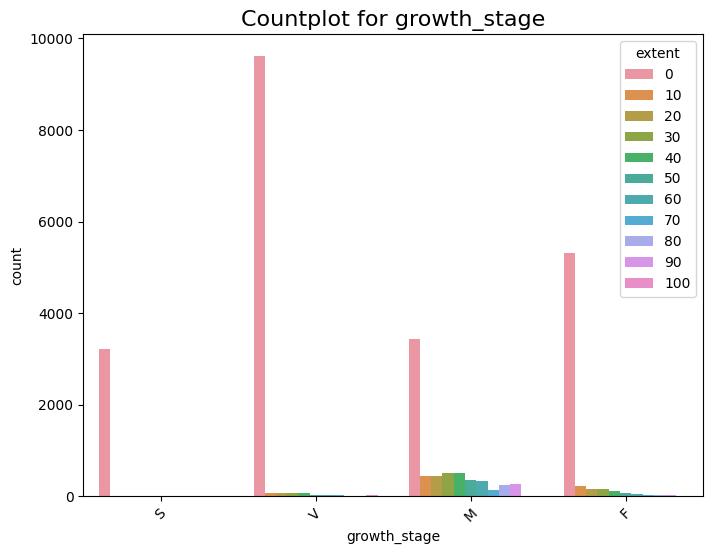

column =  damage


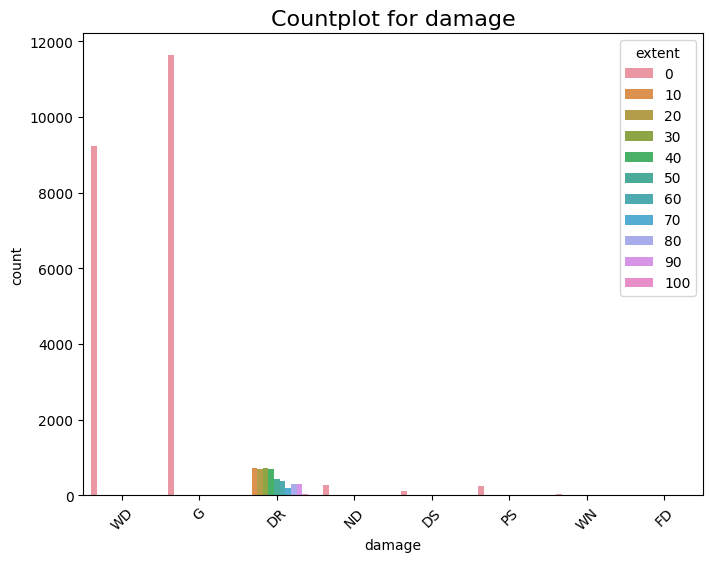

column =  season


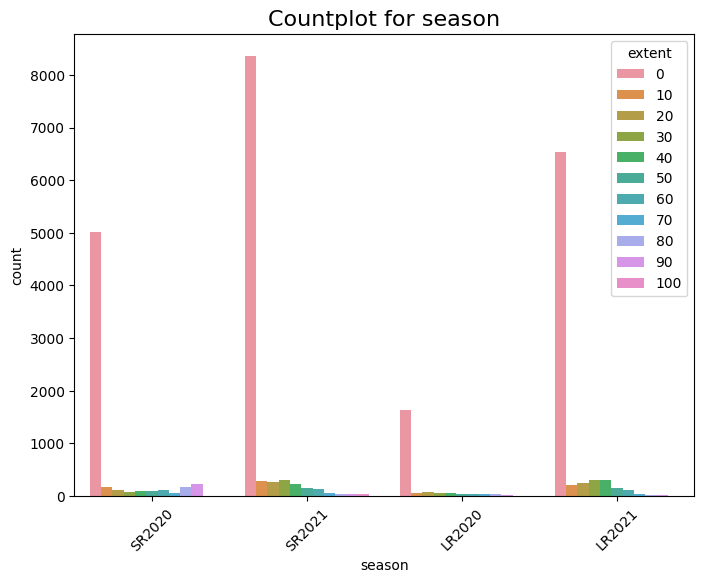

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count(df, cat_var, hue):
    for column in cat_var:
      print("column = ",column)
      plt.figure(figsize=(8, 6))
      sns.countplot(data=df, x=column, hue=target) # target = 'extent'
      plt.title(f'Countplot for {column}', fontsize=16)
      plt.xticks(rotation=45)
      plt.show()
plot_count(df=train, cat_var=cat_var, hue=target)


It's clear to see that the amount of the case "extent equal to zero" is very large so I decide to use a filter here and plot again :

column =  growth_stage


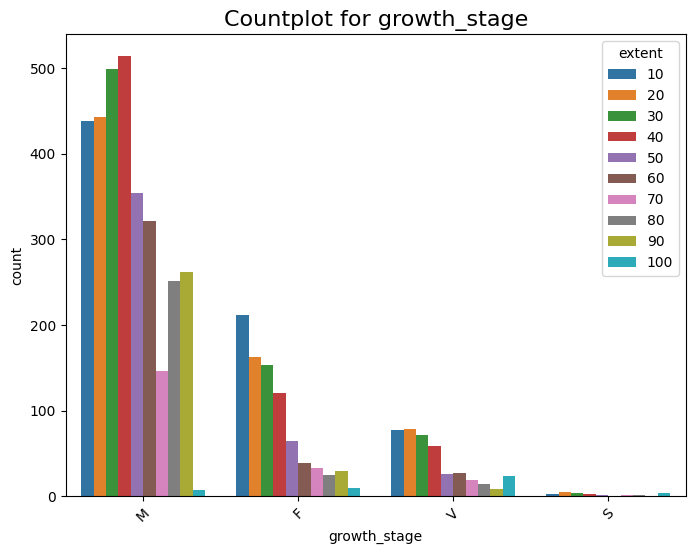

column =  damage


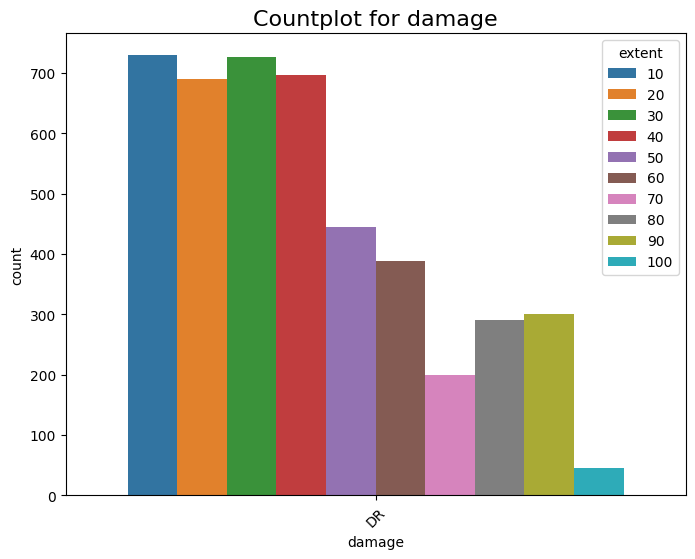

column =  season


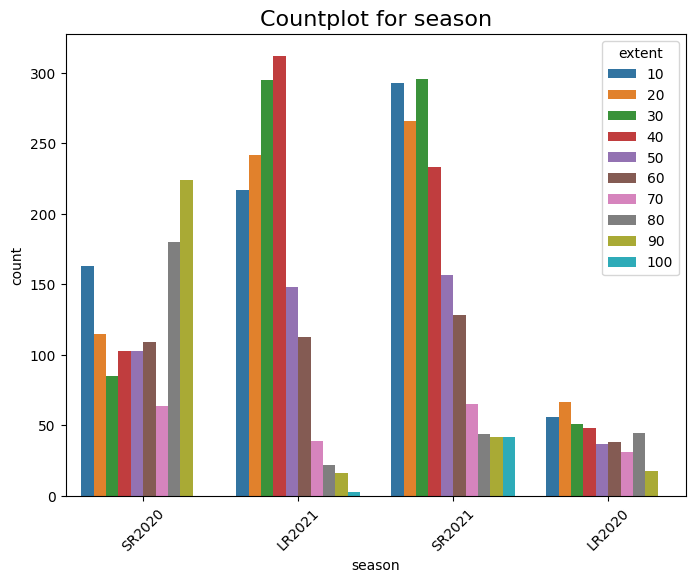

In [ ]:
filtered_train = train[train['extent'] != 0]
plot_count(df=filtered_train, cat_var=cat_var, hue=target)

 Noteworthy Observations:

1
 It's worth noting that when damage is not equal to DR, there is no claims case (nonzero extent).

 What's more, if you compare damage in filtered plot to the original one, you also can see that applications without damage (DR) are all disapproved.

2
When growth_stage='S', there is no case with extent>0.

In [ ]:
from scipy import stats
def chi_squared_test(df, input_var, target_var, significance_level=0.05):
    contingency_table = pd.crosstab(df[input_var], df[target_var])
    chi2, p, _ , _= stats.chi2_contingency(contingency_table)

    if p < significance_level:
        print(f'{input_var} has a significant relationship with the target.')
    else:
        print(f'{input_var} does not have a significant relationship with the target.')

In [ ]:
# Use chi squared independence test to choose categorical features

In [ ]:
for i in cat_var:
  chi_squared_test(df=train, input_var=i, target_var=target)

growth_stage has a significant relationship with the target.
damage has a significant relationship with the target.
season has a significant relationship with the target.


In [ ]:
train

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021
...,...,...,...,...,...,...
26063,ID_3II1SXC0ZO,L1084F03259C39S12149Rp41671.jpg,M,DR,30,SR2021
26064,ID_OE7OU9ZF4U,L406F04369C01S07190Rp22847.jpg,V,G,0,LR2021
26065,ID_20M531UIZZ,L134F00766C01S09784Rp26034.jpg,M,G,0,LR2021
26066,ID_BZBV2FH0KL,L1153F02464C01S00194Rp01561.jpg,F,G,0,SR2020


In [ ]:
train['growth_stage'] = train['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})
filtered_train['growth_stage'] = filtered_train['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})

<ipython-input-27-010789f12729>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train['growth_stage'] = filtered_train['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})


In [ ]:
train

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,1,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,2,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,2,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,4,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,2,G,0,SR2021
...,...,...,...,...,...,...
26063,ID_3II1SXC0ZO,L1084F03259C39S12149Rp41671.jpg,4,DR,30,SR2021
26064,ID_OE7OU9ZF4U,L406F04369C01S07190Rp22847.jpg,2,G,0,LR2021
26065,ID_20M531UIZZ,L134F00766C01S09784Rp26034.jpg,4,G,0,LR2021
26066,ID_BZBV2FH0KL,L1153F02464C01S00194Rp01561.jpg,3,G,0,SR2020


In [ ]:
train['damage'].value_counts()

G     11623
WD     9238
DR     4516
ND      272
PS      254
DS      115
WN       37
FD       13
Name: damage, dtype: int64

In [ ]:
filtered_train

,ID,filename,growth_stage,damage,extent,season
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,4,DR,60,SR2020
8,ID_BVNP8C4M1N,L331F04678C01S11060Rp30683.jpg,4,DR,40,LR2021
9,ID_MFL3FVUKDA,L133F00737C01S06945Rp25674.jpg,3,DR,60,LR2021
19,ID_NFYJ8T2V5W,L432F01720C01S04931Rp13768.jpg,4,DR,20,SR2020
23,ID_C74KHW4OK5,L133F03014C01S00293Rp10017.jpg,4,DR,50,SR2020
...,...,...,...,...,...,...
26050,ID_3JV0GAM9RJ,L428F00215C39S12374Rp47711.jpg,4,DR,60,SR2021
26052,ID_DWIR1Z10V3,L1094F00322C01S01964Rp02621.jpg,4,DR,10,SR2020
26055,ID_PI5UR92PXC,L1084F00023C01S01952Rp09997.jpg,4,DR,20,SR2020
26057,ID_WGVVG53Y3S,L376F03264C39S14382Rp46972.jpg,2,DR,20,SR2021


If we remove all "extent = 0" cases, we can see that damage can only be 'DR':

In [ ]:
filtered_train['damage'].value_counts()

DR    4510
Name: damage, dtype: int64

However, even when "damage = 'DR'," we can still observe scattered "extent = 0" cases and many other non-zero cases.

In [ ]:
train['extent'].loc[train['damage']=='DR'].value_counts()

10     729
30     727
40     696
20     690
50     445
60     388
90     300
80     291
70     199
100     45
0        6
Name: extent, dtype: int64

In [ ]:
# 把要訓練迴歸模型的檔案先移到雲端，下次就不用載這麼多文件
def move_files(sourse_base, source_dir_list, destination_dir):
  for dir in source_dir_list:
    source = os.path.join(sourse_base, dir)
    destination = destination_dir
    copyfile(source, os.path.join(destination_dir, dir))

sourse_base = 'Zindi_photos/train'
source_dir_list = train.loc[train['damage'] == 'DR']['filename'].tolist()
destination_dir = 'Zindi_photos/train_DR'



Thus, we can make some assumption of the dataset:


1.   假設在damage != DR 時，extent>0的機率為0。
2.   假設在growth_stage = S時，extent>0的機率為0。
3.   假設Train和Test所有特徵的分布完全相同。





這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!

In [ ]:
TRAINING_DIR = '/content/dataset/split_train'
VALIDATION_DIR = '/content/dataset/split_validation'
SPLIT_SIZE = 0.95

In [ ]:
split_data(SOURCE_DIR='Zindi_photos/train_DR', TRAINING_DIR=TRAINING_DIR, VALIDATION_DIR=VALIDATION_DIR, SPLIT_SIZE=SPLIT_SIZE)

In [ ]:
print(len(os.listdir(TRAINING_DIR)))
print(len(os.listdir(VALIDATION_DIR)))

4290
226


In [ ]:
import os
list_split_train = os.listdir(TRAINING_DIR)
list_split_validation = os.listdir(VALIDATION_DIR)
list_split_train[:10]

['L1095F00367C39S12043Rp42692.jpg',
 'L243F04643C40S12566Rp47445.jpg',
 '21_repeat_2_1356_5353_3723.JPG',
 'L333F01345C01S03721Rp14768.jpg',
 'L355F02285C01S05300Rp12956.jpg',
 'L331F04162C01S07817Rp27668.jpg',
 'L315F00144C01S03457Rp14425.jpg',
 'L410F01795C39S12338Rp48424.jpg',
 'L430F01043C39S13917Rp48168.jpg',
 'L222F03300C01S06834Rp26157.jpg']

In [ ]:
# 資料順序跟train_df相同，只是不在list_split_train中的會排除掉。
split_train_df = filtered_train[filtered_train['filename'].isin(list_split_train)]
split_val_df = filtered_train[filtered_train['filename'].isin(list_split_validation)]

train_data = split_train_df
val_data = split_val_df

print("train_data.shape = ",train_data.shape)
display(train_data.head(10))

print("val_data.shape = ",val_data.shape)
display(val_data.head(10))

train_data.shape =  (4284, 6)


,ID,filename,growth_stage,damage,extent,season
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,4,DR,60,SR2020
8,ID_BVNP8C4M1N,L331F04678C01S11060Rp30683.jpg,4,DR,40,LR2021
9,ID_MFL3FVUKDA,L133F00737C01S06945Rp25674.jpg,3,DR,60,LR2021
19,ID_NFYJ8T2V5W,L432F01720C01S04931Rp13768.jpg,4,DR,20,SR2020
23,ID_C74KHW4OK5,L133F03014C01S00293Rp10017.jpg,4,DR,50,SR2020
24,ID_BDV1VQRJAS,L398F00102C01S01131Rp13276.jpg,4,DR,50,SR2020
29,ID_8CGJ7AF96E,L134F00780C01S09773Rp27555.jpg,2,DR,30,LR2021
41,ID_L3YYRSTAP8,L134F00762C01S05370Rp14099.jpg,4,DR,70,SR2020
43,ID_53R92CXW1E,L1094F03163C39S11589Rp41682.jpg,4,DR,40,SR2021
57,ID_PGRVYINBAY,L1089F03143C01S08323Rp30596.jpg,4,DR,10,LR2021


val_data.shape =  (226, 6)


,ID,filename,growth_stage,damage,extent,season
84,ID_XDXII5MWL0,201_repeat_2_1382_6311_4680.JPG,4,DR,10,LR2020
94,ID_HP0YVFHP6M,L144F01437C39S12514Rp48970.jpg,4,DR,50,SR2021
138,ID_0WRYQF7YA4,L1153F02240C01S01054Rp07198.jpg,4,DR,80,SR2020
402,ID_8CGU38384Y,L1122F04422C39S11772Rp41116.jpg,4,DR,50,SR2021
440,ID_K9TH6Y0U1D,205_repeat_2_1105_6381_4752.JPG,4,DR,50,LR2020
579,ID_0ATP0CV0I0,L1095F00444C39S12039Dp41461.jpg,4,DR,60,SR2021
744,ID_LD20L99Q9G,L354F00183C01S02541Rp14818.jpg,4,DR,30,SR2020
1074,ID_25GRJ7BDZ1,L1093F01350C01S00984Rp03918.jpg,4,DR,20,SR2020
1192,ID_HCKFFVPWE5,L428F02102C03S09325Rp26568.jpg,2,DR,50,LR2021
1257,ID_VORF7X1491,L325F03156C01S06993Rp25961.jpg,3,DR,20,LR2021


In [ ]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
#from skimage.feature import greycomatrix, greycoprops
from PIL import Image
#from skimage import feature



def glcm_feature(base_dir, filename):
  path = os.path.join(base_dir,filename)
  img = Image.open(path) # 你要用這個套件的方式去開，不能直接傳nparray
  #plt.imshow(img)
  img1 = img.convert('L')  #convert a gray scale

  # transfer img1 into np.array
  img1 = np.array(img1)

  # 計算GLCM skimage.feature.graycomatrix
  glcm = skimage.feature.greycomatrix(img1, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=None, symmetric=True, normed=True)
  #glcm = skimage.feature.greycomatrix(img1, [1], [0], symmetric=True, normed=True)

  # 計算GLCM特徵
  contrast = skimage.feature.graycoprops(glcm, prop='contrast')
  correlation = skimage.feature.graycoprops(glcm, prop='correlation')
  homogeneity = skimage.feature.graycoprops(glcm, prop='homogeneity')
  energy = skimage.feature.graycoprops(glcm, prop='energy')
  dissimilarity = skimage.feature.graycoprops(glcm, prop='dissimilarity')
  entropy = skimage.measure.shannon_entropy(glcm)

  glcm_feat = dict( contrast=contrast[0,0], correlation=correlation[0,0], homogeneity=homogeneity[0,0], energy=energy[0,0], dissimilarity=dissimilarity[0,0], entropy=entropy)
  return glcm_feat


In [ ]:
print(skimage.__version__)

0.19.3


In [ ]:
"""
feature_test = glcm_feature(base_dir='/content', filename='101_repeat_2_1309_5365_3739.JPG')
print(feature_test['contrast'])
print(feature_test['correlation'])
print(feature_test['homogeneity'])
print(feature_test['energy'])
print(feature_test['dissimilarity'])
print(feature_test['entropy'])
"""

"\nfeature_test = glcm_feature(base_dir='/content', filename='101_repeat_2_1309_5365_3739.JPG')\nprint(feature_test['contrast'])\nprint(feature_test['correlation'])\nprint(feature_test['homogeneity'])\nprint(feature_test['energy'])\nprint(feature_test['dissimilarity'])\nprint(feature_test['entropy'])\n"

In [ ]:
for index,row in train_data.iterrows():
  feat = glcm_feature(base_dir='/content/dataset/split_train',filename=row['filename'])
  train_data.loc[index, 'contrast'] = feat['contrast']
  train_data.loc[index, 'correlation'] = feat['correlation']
  train_data.loc[index, 'energy'] = feat['energy']
  train_data.loc[index,'homogeneity'] = feat['homogeneity']
  train_data.loc[index,'dissimilarity'] = feat['dissimilarity']
  train_data.loc[index,'entropy'] = feat['entropy']


In [ ]:
train_data.head(10)

,ID,filename,growth_stage,damage,extent,season,contrast,correlation,energy,homogeneity,dissimilarity,entropy
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,4,DR,60,SR2020,1543.816331,0.744069,0.007898,0.057450,27.912601,5.562927
8,ID_BVNP8C4M1N,L331F04678C01S11060Rp30683.jpg,4,DR,40,LR2021,87.528397,0.991091,0.076725,0.242272,6.131260,3.060475
9,ID_MFL3FVUKDA,L133F00737C01S06945Rp25674.jpg,3,DR,60,LR2021,201.685012,0.979897,0.038206,0.277008,8.012614,3.768249
19,ID_NFYJ8T2V5W,L432F01720C01S04931Rp13768.jpg,4,DR,20,SR2020,15.685495,0.998582,0.037326,0.467399,2.345641,1.719170
23,ID_C74KHW4OK5,L133F03014C01S00293Rp10017.jpg,4,DR,50,SR2020,371.669213,0.968234,0.095859,0.230157,11.731687,4.275132
24,ID_BDV1VQRJAS,L398F00102C01S01131Rp13276.jpg,4,DR,50,SR2020,68.729832,0.995397,0.041244,0.438069,4.289339,2.611904
29,ID_8CGJ7AF96E,L134F00780C01S09773Rp27555.jpg,2,DR,30,LR2021,466.647855,0.961116,0.072948,0.203923,14.275574,4.244321
41,ID_L3YYRSTAP8,L134F00762C01S05370Rp14099.jpg,4,DR,70,SR2020,537.569878,0.963949,0.212492,0.270315,14.790692,3.981943
43,ID_53R92CXW1E,L1094F03163C39S11589Rp41682.jpg,4,DR,40,SR2021,190.843391,0.964754,0.016302,0.194244,9.123302,2.171531
57,ID_PGRVYINBAY,L1089F03143C01S08323Rp30596.jpg,4,DR,10,LR2021,214.316627,0.959329,0.012822,0.139341,10.323550,2.358612


In [ ]:
# For validation we also add new feature
for index,row in val_data.iterrows():
  feat = glcm_feature(base_dir='/content/dataset/split_validation',filename=row['filename'])
  val_data.loc[index, 'contrast'] = feat['contrast']
  val_data.loc[index, 'correlation'] = feat['correlation']
  val_data.loc[index, 'energy'] = feat['energy']
  val_data.loc[index, 'homogeneity'] = feat['homogeneity']
  val_data.loc[index, 'dissimilarity'] = feat['dissimilarity']
  val_data.loc[index, 'entropy'] = feat['entropy']

In [ ]:
val_data.head(10)

,ID,filename,growth_stage,damage,extent,season,contrast,correlation,energy,homogeneity,dissimilarity,entropy
84,ID_XDXII5MWL0,201_repeat_2_1382_6311_4680.JPG,4,DR,10,LR2020,251.226376,0.980549,0.108829,0.236108,9.776663,4.052039
94,ID_HP0YVFHP6M,L144F01437C39S12514Rp48970.jpg,4,DR,50,SR2021,41.668117,0.995574,0.026797,0.336172,4.097793,1.657108
138,ID_0WRYQF7YA4,L1153F02240C01S01054Rp07198.jpg,4,DR,80,SR2020,244.108278,0.972862,0.016800,0.224117,9.630337,3.917785
402,ID_8CGU38384Y,L1122F04422C39S11772Rp41116.jpg,4,DR,50,SR2021,34.484868,0.994886,0.041051,0.360402,3.497908,4.850777
440,ID_K9TH6Y0U1D,205_repeat_2_1105_6381_4752.JPG,4,DR,50,LR2020,63.066885,0.993305,0.073217,0.281551,5.397284,2.665527
579,ID_0ATP0CV0I0,L1095F00444C39S12039Dp41461.jpg,4,DR,60,SR2021,556.109855,0.898136,0.094370,0.155885,16.470331,1.848471
744,ID_LD20L99Q9G,L354F00183C01S02541Rp14818.jpg,4,DR,30,SR2020,420.838044,0.917103,0.010582,0.116160,13.609934,4.469702
1074,ID_25GRJ7BDZ1,L1093F01350C01S00984Rp03918.jpg,4,DR,20,SR2020,517.592456,0.928112,0.025971,0.204043,15.192547,4.368959
1192,ID_HCKFFVPWE5,L428F02102C03S09325Rp26568.jpg,2,DR,50,LR2021,126.770856,0.989349,0.066187,0.276524,7.015588,3.106244
1257,ID_VORF7X1491,L325F03156C01S06993Rp25961.jpg,3,DR,20,LR2021,448.395113,0.953850,0.030554,0.236262,12.987562,4.409622


In [ ]:
# 就算 damage = DR ，extent的案例還是分布不平均，所以這裡我們寫一個重複採樣函數 :

def resample(df, N):
  groups = df.groupby('extent')
  df_resample = pd.DataFrame({})
  for i in groups.size().index:
    resample = groups.get_group(i).sample(n=N, replace=True)
    df_resample = pd.concat([df_resample, resample])
    del(resample)
  return df_resample

In [ ]:
# 每一個小群裡面resample的數量先決定為原本最大的群的數量
N = train_data['extent'].value_counts().max() #200

train_data_resample = resample(df=train_data, N=N)
display(train_data_resample)

,ID,filename,growth_stage,damage,extent,season,contrast,correlation,energy,homogeneity,dissimilarity,entropy
22366,ID_9HOQQCUYGV,L242F00375C41S14070Rp46285.jpg,4,DR,10,SR2021,195.402981,0.932406,0.043798,0.326855,7.886169,6.660599
2830,ID_4BWAFCQMZJ,128_repeat_2_1047_5242_3597.JPG,3,DR,10,LR2020,204.207587,0.982422,0.094080,0.266674,8.438194,3.650492
21253,ID_JG4996XY6W,L331F04050C01S07608Rp23177.jpg,4,DR,10,LR2021,993.673122,0.894590,0.013952,0.079376,22.403619,5.437564
4082,ID_HG76PGWOQ7,L1133F00048C01S01562Rp00918.jpg,4,DR,10,SR2020,177.656325,0.987852,0.061162,0.303947,7.174250,3.495195
9570,ID_QEY0ILUEAU,L222F03152C01S06832Rp28161.jpg,4,DR,10,LR2021,129.266210,0.987253,0.068206,0.383207,5.708131,6.968660
...,...,...,...,...,...,...,...,...,...,...,...,...
11535,ID_IRUVPD85G4,L134F00794C39S14178Rp48345.jpg,3,DR,100,SR2021,860.729271,0.877081,0.008717,0.069738,20.793273,3.446208
5241,ID_0P4D9DM77H,L406F00126C39S12385Ip.jpg,1,DR,100,SR2021,263.731017,0.976406,0.101849,0.308277,9.081080,8.954915
6085,ID_EF0N63ICLA,L242F01471C41S14075Rp48528.jpg,4,DR,100,SR2021,40.726481,0.997362,0.061485,0.559923,2.562437,5.468658
17907,ID_KSYWYOS2PT,L435F03585C39S14957Rp48201.jpg,2,DR,100,SR2021,70.131622,0.992362,0.046038,0.388961,4.907380,1.607593


In [ ]:
# 對於validation set，我們先不要做resample.

In [ ]:
# 這裡負責 : 做one-hot encode
encoded_train_data_resample = pd.get_dummies(train_data_resample, columns=['season'])
encoded_train_data_resample

,ID,filename,growth_stage,damage,extent,contrast,correlation,energy,homogeneity,dissimilarity,entropy,season_LR2020,season_LR2021,season_SR2020,season_SR2021
22366,ID_9HOQQCUYGV,L242F00375C41S14070Rp46285.jpg,4,DR,10,195.402981,0.932406,0.043798,0.326855,7.886169,6.660599,0,0,0,1
2830,ID_4BWAFCQMZJ,128_repeat_2_1047_5242_3597.JPG,3,DR,10,204.207587,0.982422,0.094080,0.266674,8.438194,3.650492,1,0,0,0
21253,ID_JG4996XY6W,L331F04050C01S07608Rp23177.jpg,4,DR,10,993.673122,0.894590,0.013952,0.079376,22.403619,5.437564,0,1,0,0
4082,ID_HG76PGWOQ7,L1133F00048C01S01562Rp00918.jpg,4,DR,10,177.656325,0.987852,0.061162,0.303947,7.174250,3.495195,0,0,1,0
9570,ID_QEY0ILUEAU,L222F03152C01S06832Rp28161.jpg,4,DR,10,129.266210,0.987253,0.068206,0.383207,5.708131,6.968660,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11535,ID_IRUVPD85G4,L134F00794C39S14178Rp48345.jpg,3,DR,100,860.729271,0.877081,0.008717,0.069738,20.793273,3.446208,0,0,0,1
5241,ID_0P4D9DM77H,L406F00126C39S12385Ip.jpg,1,DR,100,263.731017,0.976406,0.101849,0.308277,9.081080,8.954915,0,0,0,1
6085,ID_EF0N63ICLA,L242F01471C41S14075Rp48528.jpg,4,DR,100,40.726481,0.997362,0.061485,0.559923,2.562437,5.468658,0,0,0,1
17907,ID_KSYWYOS2PT,L435F03585C39S14957Rp48201.jpg,2,DR,100,70.131622,0.992362,0.046038,0.388961,4.907380,1.607593,0,0,0,1


In [ ]:
encoded_val_data = pd.get_dummies(val_data, columns=['season'])
encoded_val_data

,ID,filename,growth_stage,damage,extent,contrast,correlation,energy,homogeneity,dissimilarity,entropy,season_LR2020,season_LR2021,season_SR2020,season_SR2021
84,ID_XDXII5MWL0,201_repeat_2_1382_6311_4680.JPG,4,DR,10,251.226376,0.980549,0.108829,0.236108,9.776663,4.052039,1,0,0,0
94,ID_HP0YVFHP6M,L144F01437C39S12514Rp48970.jpg,4,DR,50,41.668117,0.995574,0.026797,0.336172,4.097793,1.657108,0,0,0,1
138,ID_0WRYQF7YA4,L1153F02240C01S01054Rp07198.jpg,4,DR,80,244.108278,0.972862,0.016800,0.224117,9.630337,3.917785,0,0,1,0
402,ID_8CGU38384Y,L1122F04422C39S11772Rp41116.jpg,4,DR,50,34.484868,0.994886,0.041051,0.360402,3.497908,4.850777,0,0,0,1
440,ID_K9TH6Y0U1D,205_repeat_2_1105_6381_4752.JPG,4,DR,50,63.066885,0.993305,0.073217,0.281551,5.397284,2.665527,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25688,ID_6ZRNCIXEAA,L141F01026C39S12520Rp48256.jpg,4,DR,10,301.149073,0.890643,0.012959,0.093605,12.683268,2.353660,0,0,0,1
25773,ID_E9ND68AQF9,L1139F01996C01S01592Rp03568.jpg,4,DR,50,173.877941,0.978865,0.025183,0.206998,8.597118,3.350866,0,0,1,0
25864,ID_2WY5N86KFL,L430F01139C39S13918Rp48169.jpg,4,DR,20,627.812516,0.916247,0.011788,0.175998,15.072707,10.416681,0,0,0,1
25867,ID_S20VRGEFM0,L121F00601C01S08523Rp32104.jpg,4,DR,30,200.004728,0.985346,0.078487,0.345552,7.406609,2.221435,0,1,0,0


In [ ]:
INPUT_SHAPE = (250, 250, 3)
TARGET_SIZE = (250, 250)

In [ ]:

import matplotlib.pyplot as plt
from PIL import Image

def show_image(image):
  # 將 PIL 影像轉換為 Matplotlib 影像對象
  img_to_show = Image.fromarray(np.uint8(image))  # 这里需要确保 image 是正确的 NumPy 数组

  # 顯示圖像
  plt.imshow(img_to_show)
  plt.axis('off')  # 影藏座標軸
  plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import pandas as pd
import numpy as np
from glob import glob
from keras.preprocessing import image as krs_image

"""
    Creates train/val generators on images and csv data.

    Arguments:

    base_dir : string
      base directory for images.

    images_list : list of string
        Filename to a directory with subdirectories for each class.

    dataframe : pandas.DataFrame
        dataframe contained corresponding features to a specific image

    batch_size : int
        batch size
"""


# Create an empty data generator
datagen = ImageDataGenerator(rescale=1. / 255)


"""
檔案名稱列表
根目錄
"""

# 原作者的 images_list 是包含所有圖片整條路徑的清單
# 而我們有根目錄和圖片檔名的清單，可以在需要時組合
def custom_generator(base_dir, images_list, dataframe, batch_size):
    i = 0
    while True:
        batch = {'images': [], 'csv': [], 'labels': []}
        for b in range(batch_size):
            if i == len(images_list):
                i = 0
                random.shuffle(images_list)
            #這邊讀圖片
            # Read image from list and convert to array
            image_path = os.path.join(base_dir,images_list[i])# TRAINING_DIR
            image_name = os.path.basename(image_path)

            image = None
            try:
                image = krs_image.load_img(image_path, target_size=(TARGET_SIZE[0], TARGET_SIZE[1])) # 其實可以設定target size

                #先不要，這一行有問題image = datagen.apply_transform(image, data_gen_args)
                image = krs_image.img_to_array(image)

                #這邊讀其他資料，依照你dataframe的設置
                # Read data from csv using the name of current image

                csv_row = dataframe.loc[dataframe['filename']==image_name].drop_duplicates()

                try:
                  label = csv_row['extent'] # 在取出的row裡面拿其中一個feature作為label，這裡應該要取extent才對
                except:
                  label = 999

                csv_features = csv_row.drop(labels=['ID','filename','damage'],axis=1) #取完之後把他從訓練資料去除，因為訓練資料跟標籤要分開，剩下的就是要學習的feature!!
                try:
                  csv_features = csv_features.drop(labels=['extent'],axis=1)
                except:
                  pass

                # Add new data into batch
                batch['images'].append(image)
                batch['csv'].append(csv_features)
                batch['labels'].append(label)

                i += 1
            except FileNotFoundError:
                # 找不到圖片時採取的動作
                print(f"Error : Image not found: {image_path}")


        batch['images'] = np.array(batch['images'])
        batch['csv'] = np.squeeze(np.array(batch['csv']))
        batch['labels'] = np.squeeze(np.array(batch['labels']))

        yield [batch['images'], batch['csv']], batch['labels']

In [ ]:
mixed_train_generator = custom_generator(base_dir=TRAINING_DIR,images_list=encoded_train_data_resample['filename'].tolist(),dataframe=encoded_train_data_resample,batch_size=128)
mixed_val_generator = custom_generator(base_dir=VALIDATION_DIR,images_list=encoded_val_data['filename'].tolist(),dataframe=encoded_val_data,batch_size=128)

In [ ]:
"""
for item in mixed_val_generator:
  print(item[0][0].shape)
  print(item[0][1].shape)
  print(item[1].shape)
"""

'\nfor item in mixed_val_generator:\n  print(item[0][0].shape)\n  print(item[0][1].shape)\n  print(item[1].shape)\n'

In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2023-10-09 13:00:58--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.207, 64.233.191.207, 173.194.74.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   173MB/s    in 0.5s    

2023-10-09 13:00:59 (173 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = INPUT_SHAPE,
                                include_top = False,
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
FEATURE_SHAPE= 11 #8 #7 #5

In [ ]:
from keras.models import Model

feature_extraction_layer = pre_trained_model.get_layer('mixed7')
#conv1 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(feature_extraction_layer.output)
#pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
#conv2 = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(pool1)
#pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
flatten_features = tf.keras.layers.Flatten()(feature_extraction_layer.output)
flatten_features_drop = tf.keras.layers.Dropout(0.7)(flatten_features) #0.65
x1 = tf.keras.layers.Dense(1024)(flatten_features)
x1_drop = tf.keras.layers.Dropout(0.6)(x1)  #0.5 #0.45 #0.3
x2 = tf.keras.layers.Dense(512, activation = 'relu')(x1_drop) #256
x =Model(inputs=pre_trained_model.input,outputs=x2)
print(" inputA =",pre_trained_model.input)


inputB = tf.keras.Input(shape=(FEATURE_SHAPE,), name='feature_input')
#d1 = tf.keras.layers.Dense(64, activation="relu")(inputB)
d1 = tf.keras.layers.Dense(64)(inputB)
d1_norm = tf.keras.layers.BatchNormalization(name='batch_normalization_DNN1')(d1)
d1_acti = tf.keras.layers.Activation('relu',name='activation_DNN1')(d1_norm)
d1_drop = tf.keras.layers.Dropout(0.3)(d1_acti)
d2 = tf.keras.layers.Dense(64, activation="relu")(d1_drop) #32
d2_drop = tf.keras.layers.Dropout(0.5)(d2) #0.2    # 0.3 # 新增，沒有這一項之前 train 和 vali 可同步接近520
d3 = tf.keras.layers.Dense(72, activation="relu")(d2_drop) #128  # 32
y = Model(inputs=inputB, outputs=d3)

print(" inputB =",inputB)

combined = tf.keras.layers.concatenate([x.output, y.output])

print(" combined = ",combined)

z = tf.keras.layers.Dense(4, activation="relu")(combined) #2
z = tf.keras.layers.Dense(1, activation="linear")(z)

mixed_model = Model(inputs=[x.input, y.input], outputs=z)

#mixed_model.summary()

 inputA = KerasTensor(type_spec=TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
 inputB = KerasTensor(type_spec=TensorSpec(shape=(None, 11), dtype=tf.float32, name='feature_input'), name='feature_input', description="created by layer 'feature_input'")
 combined =  KerasTensor(type_spec=TensorSpec(shape=(None, 584), dtype=tf.float32, name=None), name='concatenate_3/concat:0', description="created by layer 'concatenate_3'")


In [ ]:
mixed_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-5 ), loss='mse', metrics='mse') #5*1e-6

In [ ]:
steps_per_epoch = len(encoded_train_data_resample) // 128 #47 #mixed_generator.samples #
validation_steps = len(encoded_val_data)//128

In [ ]:
Stop_val_mse = 570
Stop_mse = 450
class myCallback(tf.keras.callbacks.Callback): #要記得繼承，否則這個類別只有你後來定義的函數
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if ((logs.get('mse') is not None) & (logs.get('val_mse') is not None)) and ((logs.get('mse') < Stop_mse) & (logs.get('val_mse') < Stop_val_mse) ) :
                # Stop training once the above condition is met
                self.model.stop_training = True
                print("\nTrain mse reached ", Stop_mse ," and Val mse reached ", Stop_val_mse ,", so cancelling training!")

In [ ]:
checkpoint_path = "/content/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

# Create a callback for early stpping
my_callback = myCallback()

In [ ]:
history=mixed_model.fit(mixed_train_generator, validation_data=mixed_val_generator, verbose = 1, epochs = 15 ,callbacks=[cp_callback, my_callback], steps_per_epoch=steps_per_epoch ,validation_steps = validation_steps)

Epoch 1/15
54/54 [==============================] - ETA: 0s - loss: 978.7188 - mse: 978.7188
Epoch 1: saving model to /content/cp.ckpt
54/54 [==============================] - 160s 3s/step - loss: 978.7188 - mse: 978.7188 - val_loss: 691.4441 - val_mse: 691.4441
Epoch 2/15
54/54 [==============================] - ETA: 0s - loss: 715.3450 - mse: 715.3450
Epoch 2: saving model to /content/cp.ckpt
54/54 [==============================] - 149s 3s/step - loss: 715.3450 - mse: 715.3450 - val_loss: 635.7774 - val_mse: 635.7774
Epoch 3/15
54/54 [==============================] - ETA: 0s - loss: 650.3337 - mse: 650.3337
Epoch 3: saving model to /content/cp.ckpt
54/54 [==============================] - 154s 3s/step - loss: 650.3337 - mse: 650.3337 - val_loss: 569.7551 - val_mse: 569.7551
Epoch 4/15
54/54 [==============================] - ETA: 0s - loss: 588.3093 - mse: 588.3093
Epoch 4: saving model to /content/cp.ckpt
54/54 [==============================] - 154s 3s/step - loss: 588.3093 - mse

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


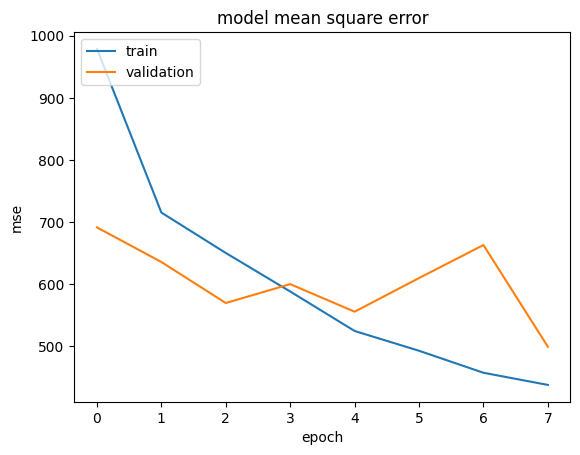

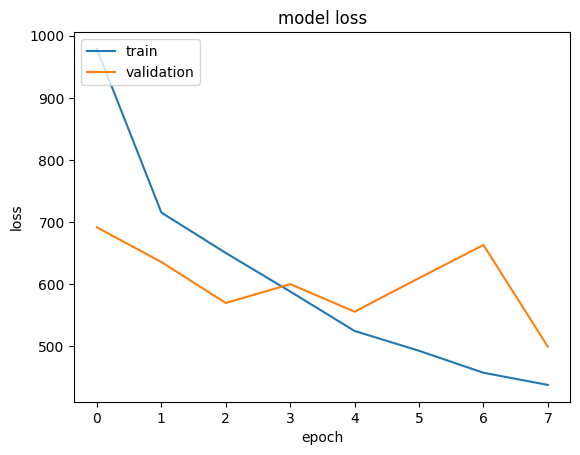

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean square error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
move_files(sourse_base='Zindi_photos/test', source_dir_list=test['filename'].tolist(), destination_dir='/content/dataset/test')

In [ ]:

# For test we also add new feature
for index,row in test.iterrows():
  feat = glcm_feature(base_dir='/content/dataset/test',filename=row['filename'])
  test.loc[index, 'contrast'] = feat['contrast']
  test.loc[index, 'correlation'] = feat['correlation']
  test.loc[index, 'energy'] = feat['energy']
  test.loc[index, 'homogeneity'] = feat['homogeneity']
  test.loc[index, 'dissimilarity'] = feat['dissimilarity']
  test.loc[index, 'entropy'] = feat['entropy']

test.head(10)

In [ ]:

encoded_test = pd.get_dummies(test, columns=['season'])
encoded_test['growth_stage'] = encoded_test['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})
test_generator = custom_generator(base_dir='Zindi_photos/test',images_list=test['filename'].tolist(),dataframe=encoded_test,batch_size=128)

In [ ]:
encoded_test.head()

,ID,filename,growth_stage,damage,contrast,correlation,energy,homogeneity,dissimilarity,entropy,season_LR2020,season_LR2021,season_SR2020,season_SR2021
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,2,WD,769.809928,0.928156,0.018506,0.185620,15.716213,5.021000,0,0,1,0
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,3,WD,107.885231,0.990632,0.076887,0.318897,5.589476,3.206252,0,1,0,0
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,2,WD,241.066366,0.971912,0.016650,0.193593,9.481387,2.644680,0,0,0,1
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,3,G,60.848562,0.996358,0.129657,0.454540,3.769233,2.711062,1,0,0,0
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,3,G,631.392844,0.915272,0.020569,0.123072,16.943933,4.817210,0,1,0,0


In [ ]:
def predict_submission(test,batch_size,base_dir):
  steps = len(test) // batch_size
  encoded_test = pd.get_dummies(test, columns=['season'])
  encoded_test['growth_stage'] = encoded_test['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})
  test_generator = custom_generator(base_dir=base_dir,images_list=encoded_test['filename'].tolist(),dataframe=encoded_test,batch_size=batch_size)
  sub_predict = mixed_model.predict(test_generator,steps=steps)
  print(f"There are {sub_predict.shape[0]} predicts are generated")

  extent_predict = pd.DataFrame(sub_predict, columns = ['extent'])
  sub_predict = pd.concat([test, extent_predict],axis=1)


  sub_predict.loc[sub_predict['damage'] != 'DR', 'extent'] = 0
  Nonr_set_zeros = sub_predict['extent'].isna().sum()
  sub_predict.loc[sub_predict['extent'].isna(), 'extent'] = 0

  print(f"There are {Nonr_set_zeros} NaN set to zero.")

  sub_predict.drop(['filename',	'growth_stage',	'damage',	'season', 'contrast',	'correlation', 'energy', 'homogeneity', 'dissimilarity', 'entropy'], axis=1).to_csv('/content/submission.csv',index=False)

  return sub_predict

In [ ]:
predict_sub = predict_submission(test=test,batch_size=128,base_dir='Zindi_photos/test')

67/67 [==============================] - 163s 2s/step
There are 8576 predicts are generated
There are 16 NaN set to zero.


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
test.head(10)

,ID,filename,growth_stage,damage,season
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,V,WD,SR2020
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,F,WD,LR2021
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,V,WD,SR2021
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,F,G,LR2020
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,F,G,LR2021
5,ID_UNHML5U0MD,L1093F01069C01S07132Rp28122.jpg,M,G,LR2021
6,ID_CI58MP4OGP,L133F00088C01S01080Rp02659.jpg,V,WD,SR2020
7,ID_466PP8MNK9,L992F04383C01S07260Rp31884.jpg,M,WD,LR2021
8,ID_ADBF3LZ34D,L1115F00400C39S13979Ip.jpg,V,WD,SR2021
9,ID_7W0QLGVDQN,L331F04164C01S07715Rp21721.jpg,M,DR,LR2021


In [ ]:
predict_sub.head(100)

,ID,filename,growth_stage,damage,season,extent
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,V,WD,SR2020,0.000000
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,F,WD,LR2021,0.000000
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,V,WD,SR2021,0.000000
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,F,G,LR2020,0.000000
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,F,G,LR2021,0.000000
...,...,...,...,...,...,...
95,ID_2PHH4YIJ8W,L353F03620C01S01305Rp08685.jpg,M,DR,SR2020,0.000145
96,ID_KMZBX9NGYS,L433F00647C01S01268Rp13054.jpg,M,DR,SR2020,0.000145
97,ID_89EPA6BGTV,L221F01712C39S13034Ip.jpg,V,G,SR2021,0.000000
98,ID_3DQRO4PV4B,L415F04518C39S12708Ip.jpg,S,G,SR2021,0.000000


In [ ]:
predict_sub.drop(['filename',	'growth_stage',	'damage',	'season'], axis=1).to_csv('/content/test_sub.csv',index=False)

In [ ]:
pd.to_csv

In [ ]:
predict_sub.loc[predict_sub['damage'] != 'DR', 'extent'] = 0
predict_sub.loc[predict_sub['damage'] == 'DR'].isna().sum()

ID              0
filename        0
growth_stage    0
damage          0
season          0
extent          0
dtype: int64

In [ ]:
predict_sub.loc[predict_sub['extent'].isna(), 'extent'] = 0
predict_sub.loc[predict_sub['damage'] == 'DR'].isna().sum()
Nonr_set_zeros = predict_sub['extent'].isna().sum()
predict_sub['extent']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8658    0.0
8659    0.0
8660    0.0
8661    0.0
8662    0.0
Name: extent, Length: 8663, dtype: float32

In [ ]:
print("len(test) = ",len(test))
print("len(predict_sub) = ",len(predict_sub))

len(test) =  8663
len(predict_sub) =  8663


In [ ]:
loaded_model.load_weights(checkpoint_path)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
from keras.applications import InceptionV3
from keras.models import Model

model = Model(inputs=pre_trained_model.input, outputs=x3)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 3 * 1e-5), loss='mse', metrics='mse') #Adam learning_rate=3 * 1e-5

In [ ]:
history = model.fit(train_generator, validation_data=None, verbose = 1, epochs = 5 ,callbacks=None )

NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True) #,brightness_range=(0.8,1.2), rotation_range=0.2, zoom_range=0.2)
"""


width_shift_range=0.2,
height_shift_range=0.2,

shear_range=0.0)
"""
validation_datagen = ImageDataGenerator(rescale=1./255)


# data 是一個包含 'filename'和 'extent'的dataframe，x_col 設為'filename', y_col設為'extent'
train_generator = train_datagen.flow_from_dataframe(dataframe=train_data_resample, directory=TRAINING_DIR,
                                              x_col="filename", y_col="extent", has_ext=True,
                                              class_mode="other", target_size=TARGET_SIZE,
                                              batch_size=128)

# valid_data 是一個包含 'filename'和 'extent'的dataframe，x_col 設為'filename', y_col設為'extent'

validation_generator = validation_datagen.flow_from_dataframe(dataframe=val_data, directory=VALIDATION_DIR,
                                              x_col="filename", y_col="extent", has_ext=True,
                                              class_mode="other", target_size=TARGET_SIZE,
                                              batch_size=128)


Found 6110 validated image filenames.
Found 902 validated image filenames.


In [ ]:
"""
import numpy as np

def encode_split(df,protion=0.8):
  df_encoded = pd.get_dummies(df, columns=['damage', 'season'])
  display(df_encoded)
  train_data, validation_data = train_test_split(df_encoded.values, random_state=35, train_size=protion)
  X_train = np.hstack((train_data[:, 2].reshape(-1, 1), train_data[:, 4:]))
  y_train = train_data[:,3]
  print("X_train.shape = ",X_train.shape,", y_train.shape = ",y_train.shape)

  X_val = np.hstack((validation_data[:, 2].reshape(-1, 1), validation_data[:, 4:]))
  y_val = validation_data[:,3]
  print("X_val.shape = ",X_val.shape,", y_val.shape = ",y_val.shape)
  return X_train,y_train,X_val,y_val
"""

In [ ]:
INPUT_DIM = X_train.shape[1]
INPUT_DIM

13

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16,activation='relu',input_dim=INPUT_DIM),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=['mse'])
model.fit(X_train.astype('float'),y_train.astype('float'),validation_data=(X_val.astype('float'), y_val.astype('float')),epochs=100)

In [ ]:
"""
image = krs_image.load_img(image_path, target_size=(TARGET_SIZE[0], TARGET_SIZE[1])) # 其實可以設定target size
            print("shape of image is",np.shape(image))
            import matplotlib.pyplot as plt
            from PIL import Image
            img_to_show = Image.fromarray(np.uint8(image))
            plt.imshow(img_to_show)
            plt.axis('off')  # 隐藏坐标轴
            plt.show()
"""

In [ ]:
# Backup
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import pandas as pd
import numpy as np
from glob import glob
from keras.preprocessing import image as krs_image

"""
    Creates train/val generators on images and csv data.

    Arguments:

    images_dir : string
        Path to a directory with subdirectories for each class.

    csv_dir : string
        Path to a directory containing train/val csv files with extra attributes.

    split : string
        Current split being used (train, val or test)
"""

# Create the arguments for image preprocessing

"""
data_gen_args = dict(
    #horizontal_flip=True,
    #brightness_range=[0.5, 1.5],
    #shear_range=10,
    #channel_shift_range=50,
    rescale=1. / 255,
)
"""

# Create an empty data generator
datagen = ImageDataGenerator(rescale=1. / 255)

"""
# Read the image list and csv
image_file_list = glob(f'{images_dir}/{split}/**/*.JPG', recursive=True) # 整條路徑的清單
df = pd.read_csv(f'{csv_dir}/{split}.csv', index_col=csv_data[0])
random.shuffle(image_file_list)
"""

"""
檔案名稱列表
根目錄
"""

# 原作者的 images_list 是包含所有圖片整條路徑的清單
# 而我們有根目錄和圖片檔名的清單，可以在需要時組合
def custom_generator(images_list, dataframe, batch_size):
    i = 0
    while True:
        batch = {'images': [], 'csv': [], 'labels': []}
        for b in range(batch_size):
            if i == len(images_list):
                i = 0
                random.shuffle(images_list)
            #這邊讀圖片
            # Read image from list and convert to array
            image_path = os.path.join(TRAINING_DIR,images_list[i])#images_list[i]
            image_name = os.path.basename(image_path)

            image = krs_image.load_img(image_path, target_size=(TARGET_SIZE[0], TARGET_SIZE[1])) # 其實可以設定target size
            # image = some_default_image

            #show_image(image)
            #先不要，這一行有問題image = datagen.apply_transform(image, data_gen_args)
            image = krs_image.img_to_array(image)

            #這邊讀其他資料，依照你dataframe的設置
            # Read data from csv using the name of current image
            #print("image_name=",image_name)
            csv_row = dataframe.loc[dataframe['filename']==image_name].drop_duplicates() #csv_row = dataframe.loc[image_name, :] # 先把指定的一整個row取出來 row : image_name, column : 所有columns
            #display(csv_row)
            label = csv_row['extent'] # 在取出的row裡面拿其中一個feature作為label，這裡應該要取extent才對
            # label = csv_row['class']
            csv_features = csv_row.drop(labels=['ID','filename','damage','extent'],axis=1) #取完之後把他從訓練資料去除，因為訓練資料跟標籤要分開，剩下的就是要學習的feature!!
            # csv_features = csv_row.drop(labels='class')

            batch['images'].append(image)
            batch['csv'].append(csv_features)
            batch['labels'].append(label)

            i += 1

        batch['images'] = np.array(batch['images'])
        #print("np.squeeze(np.array(batch['csv'])) = ",np.squeeze(np.array(batch['csv'])))
        batch['csv'] = np.squeeze(np.array(batch['csv']))
        batch['labels'] = np.squeeze(np.array(batch['labels']))

        yield [batch['images'], batch['csv']], batch['labels']